In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
#from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.shape

(5043, 28)

In [4]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
df['color'] = df['color'].fillna('Unknown')
df['director_name'] = df['director_name'].fillna('Unknown')
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())
df['duration'] = df['duration'].fillna(df['duration'].median())
df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].median())
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median())
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].median())
df['actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('Unknown')
df['actor_1_name'] = df['actor_1_name'].fillna('Unknown')
df['gross'] = df['gross'].fillna(df['gross'].median())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df['plot_keywords'] = df['plot_keywords'].fillna('Unknown')
df['language'] = df['language'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['content_rating'] = df['content_rating'].fillna('Unknown')
df['budget'] = df['budget'].fillna(df['budget'].median())
df['title_year'] = df['title_year'].fillna(df['title_year'].median())
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())

df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [8]:
color_ = pd.get_dummies(df['color'])
genres_ = df['genres'].str.get_dummies(sep='|')
plot_keywords_ = df['plot_keywords'].str.get_dummies(sep='|')
language_ = pd.get_dummies(df['language'])
country_ = pd.get_dummies(df['country'])
content_rating_ = pd.get_dummies(df['content_rating'])
title_year_ = pd.get_dummies(df['title_year'])
genres_.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = pd.concat([genres_, plot_keywords_, content_rating_, 
#                title_year_,color_, language_, country_, 
#               df['num_critic_for_reviews'], df['num_user_for_reviews'], df['duration']
               df['director_facebook_likes'], df['actor_3_facebook_likes'],df['actor_2_facebook_likes'],df['actor_1_facebook_likes']
#               df['actor_3_name'], df['actor_2_name'], df['actor_1_name'], df['movie_title'], df['director_name'], 
#               df['budget'], df['aspect_ratio']
              ],axis=1)
X.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,TV-PG,TV-Y,TV-Y7,Unknown,Unrated,X,director_facebook_likes,actor_3_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.0,855.0,936.0,1000.0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,563.0,1000.0,5000.0,40000.0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,161.0,393.0,11000.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,22000.0,23000.0,23000.0,27000.0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,131.0,371.5,12.0,131.0


In [10]:
scaled = MaxAbsScaler()
X = scaled.fit_transform(X)

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors
recommendations = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(X)
recommendations.kneighbors(X)

(array([[0.        , 2.82877785, 3.00022355, ..., 3.16237783, 3.16237877,
         3.1623805 ],
        [0.        , 2.82842712, 2.82879849, ..., 3.16270845, 3.16270845,
         3.16271084],
        [0.        , 2.44970665, 2.44970665, ..., 2.82848583, 2.82849992,
         2.82851723],
        ...,
        [0.        , 1.00000394, 1.0000167 , ..., 1.41421371, 1.41421378,
         1.41421745],
        [0.        , 1.00000444, 1.41421391, ..., 1.73205379, 1.73206367,
         1.73207896],
        [0.        , 2.44948981, 2.44948995, ..., 2.82842738, 2.82842763,
         2.82842766]]), array([[   0, 4690, 2388, ...,  268, 1334,  882],
        [   1,  205,   18, ..., 2650,  213,  341],
        [   2, 2944,  286, ..., 2388,  365, 1779],
        ...,
        [5040, 3866, 5002, ..., 5016, 5028, 4919],
        [5041, 4430, 3254, ..., 2713, 4441, 3965],
        [5042, 4800, 4880, ..., 4323, 4746, 4963]], dtype=int64))

In [12]:
movie_indices = recommendations.kneighbors(X)[1] 

In [20]:
def get_index(x):
    return df[df['director_name']==x].index.tolist()[0]

def get_recommend_item(movie):
    print('Here are 10 movies similar to', movie, ':' '\n')
    index = get_index(movie)
    
    for i in movie_indices[index][1:]:
            print('Director Name:', df.iloc[i]['director_name'], 
                  '\n' 'Movie Title: ', df.iloc[i]['movie_title'],
                  '\n' 'Title Year: ', df.iloc[i]['title_year'],
                  '\n' 'Genres: ', df.iloc[i]['genres'],
                  '\n' 'plot_keywords: ', df.iloc[i]['plot_keywords'], 
                  '\n')

In [21]:
get_recommend_item('Gore Verbinski')

Here are 10 movies similar to Gore Verbinski :

Director Name: Gore Verbinski 
Movie Title:  Pirates of the Caribbean: The Curse of the Black Pearl  
Title Year:  2003.0 
Genres:  Action|Adventure|Fantasy 
plot_keywords:  caribbean|curse|governor|pirate|undead 

Director Name: Rob Marshall 
Movie Title:  Pirates of the Caribbean: On Stranger Tides  
Title Year:  2011.0 
Genres:  Action|Adventure|Fantasy 
plot_keywords:  blackbeard|captain|pirate|revenge|soldier 

Director Name: Danny Pang 
Movie Title:  Out of Inferno  
Title Year:  2013.0 
Genres:  Action 
plot_keywords:  Unknown 

Director Name: Joseph Kosinski 
Movie Title:  Destiny  
Title Year:  2014.0 
Genres:  Action|Adventure|Fantasy|Sci-Fi 
plot_keywords:  first person shooter 

Director Name: Matt Birch 
Movie Title:  Harry Potter and the Deathly Hallows: Part II  
Title Year:  2011.0 
Genres:  Action|Fantasy 
plot_keywords:  Unknown 

Director Name: Ernie Barbarash 
Movie Title:  Falcon Rising  
Title Year:  2014.0 
Genres: 

In [15]:
df['movie_title'].tail(10)

5033                       Primer 
5034                       Cavite 
5035                  El Mariachi 
5036              The Mongol King 
5037                    Newlyweds 
5038      Signed Sealed Delivered 
5039    The Following             
5040         A Plague So Pleasant 
5041             Shanghai Calling 
5042            My Date with Drew 
Name: movie_title, dtype: object

In [22]:
col_name = df.columns.tolist()
col_name

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [24]:
df[df['imdb_score']>7.5].shape[0]

747

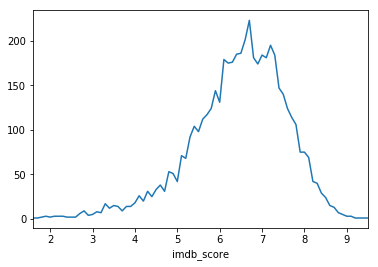

In [25]:
df_groupby_ratings = df.groupby(['imdb_score'])['movie_title'].count()
df_groupby_ratings.plot()

#we can see more than 200  movies have rating of around 6.5

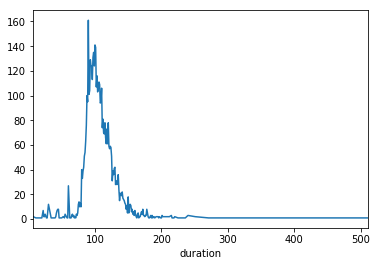

In [26]:
df_groupby_duration = df.groupby(['duration'])['movie_title'].count()
df_groupby_duration.plot()

In [27]:
df[df['duration'] <= 100].shape[0]

2179

In [28]:
df[df['duration'] >= 180].shape[0]

68

#See 68 movies have time duration more than equal to 3 hr.
#average movie time duration is 107 min

In [29]:
#how many language's movies are in data
df['language'].unique()

array(['English', 'Unknown', 'Japanese', 'French', 'Mandarin',
       'Aboriginal', 'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya',
       'Kazakh', 'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian',
       'Swedish', 'Korean', 'Thai', 'Polish', 'Bosnian', 'None',
       'Hungarian', 'Portuguese', 'Danish', 'Arabic', 'Norwegian',
       'Czech', 'Kannada', 'Zulu', 'Panjabi', 'Tamil', 'Dzongkha',
       'Vietnamese', 'Indonesian', 'Urdu', 'Romanian', 'Persian',
       'Slovenian', 'Greek', 'Swahili'], dtype=object)

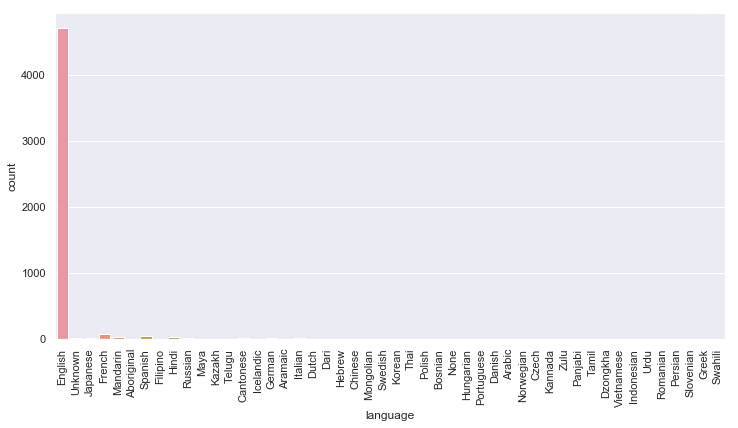

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.countplot(x="language", data = df)
ax = plt.xticks(rotation=90)

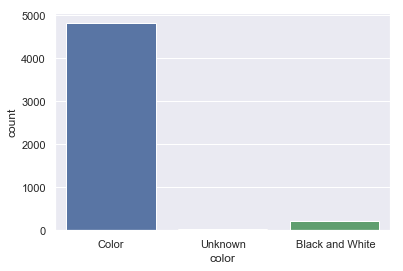

In [33]:
sns.set(style="darkgrid")
sns.countplot(x="color", data = df)

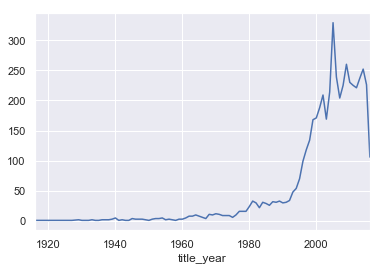

In [34]:
# plot title year vs gross
df_groupby_gross = df.groupby(['title_year'])['gross'].count()
df_groupby_gross.plot()

In [35]:
df[df['language'] == 'English'].shape[0] # number of english movies

4704